In [35]:
from pathlib import Path
from mord import LogisticIT

import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from dmba import backward_elimination, forward_selection, stepwise_selection
from sklearn.preprocessing import StandardScaler
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import plot_tree, export_text

from dmba import plotDecisionTree, classificationSummary, regressionSummary, gainsChart, liftChart

%matplotlib inline   
import matplotlib.pylab as plt


# Data Reading ,Exploring, Cleaning and Preparing for Analysis

In [38]:
# Create data frame from the original data set.
employee_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Determine dimensions of dataframe. 
print("Size of the DataFrame:", employee_df.shape)


Size of the DataFrame: (1470, 35)


In [24]:
# Show the Employee Attrition data frame.
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [41]:
#Displaying the column names

employee_df.columns
print("Original Columun Names :",employee_df.columns)

employee_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
print("Single Columun Names :", employee_df.columns)

Original Columun Names : Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Single Columun Names : Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolve

In [42]:
print("The Data Type of Columns:", employee_df.dtypes)

The Data Type of Columns: Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             

In [43]:
employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [44]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
employee_df_reg = pd.get_dummies(employee_df, columns=['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], prefix_sep='_', 
                            drop_first=True)

In [46]:
employee_df_reg.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_Y

In [47]:
employee_df_reg.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [50]:
print("The Total Number of Null Values in Each Column:\n", employee_df_reg.isnull().sum())

The Total Number of Null Values in Each Column:
 Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition_Yes                        0
BusinessTravel_

In [51]:
np.round(employee_df_reg.describe(),2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.0,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,...,0.18,0.07,0.1,0.05,0.2,0.22,0.06,0.46,0.32,0.28
std,9.14,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,...,0.38,0.25,0.3,0.23,0.4,0.42,0.23,0.50,0.47,0.45
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,36.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00
75%,43.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,1.00,1.00,1.00
max,60.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,...,1.00,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00


# Implementing Algorithms

In [52]:
#Partitioning the data for analysis
X = employee_df_reg.drop(columns=['Attrition_Yes'])
y = employee_df_reg['Attrition_Yes']

# Develop training (60%) and validation(40% or 0.4) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Implementing Logistic Regression

In [53]:
# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.302
Coefficients for Predictors
          Age  DailyRate  DistanceFromHome  Education  \
Coeff: -0.019       -0.0             0.041      0.119   

        EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Coeff:                   -0.446       0.008          -0.399     0.023   

        JobSatisfaction  MonthlyIncome  ...  JobRole_Laboratory Technician  \
Coeff:           -0.253           -0.0  ...                           0.86   

        JobRole_Manager  JobRole_Manufacturing Director  \
Coeff:            0.035                          -0.311   

        JobRole_Research Director  JobRole_Research Scientist  \
Coeff:                     -0.072                       -0.27   

        JobRole_Sales Executive  JobRole_Sales Representative  \
Coeff:                   -0.252                         0.599   

        MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  
Coeff:                 

In [54]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
1291       1               0  0.9732  0.0268
1153       1               1  0.2268  0.7732
720        1               1  0.4027  0.5973
763        0               0  0.5958  0.4042
976        0               0  0.8812  0.1188
724        0               0  0.9918  0.0082
314        0               0  0.8303  0.1697
258        0               0  0.9390  0.0610
442        0               0  0.8941  0.1059
1393       0               0  0.9807  0.0193
894        0               0  0.9996  0.0004
435        1               0  0.8300  0.1700
952        1               1  0.3724  0.6276
236        1               0  0.8596  0.1404
1170       0               0  0.9189  0.0811
1295       0               0  0.7611  0.2389
826        0               0  0.9675  0.0325
453        1               1  0.3511  0.6489
1230       0               0  0.8143  0.1857
702        0               0  0.9222  0.0778


In [56]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9036)

       Prediction
Actual   0   1
     0 740   7
     1  78  57

Validation Partition
Confusion Matrix (Accuracy 0.8605)

       Prediction
Actual   0   1
     0 469  17
     1  65  37


# Implementing Ordinal Logistic Model 

In [13]:
# Develop and display ordinal logistic model. 

# Change np.int to int in the latest update of NumPy.
np.int = int

# Utilize LogisticIT() function from mord library to 
# develop ordinal logistic regression. alpha = 0 
# means no regularizaiton in this function. 
logit_ord = LogisticIT(alpha=0)
logit_ord.fit(train_X, train_y)

# Display intercept (logit_ord.theta) and coefficients of
# the ordinal logistic regression (logit_ord.coef_). 
print('Ordinal Logistic Regression')
print('  Intercepts', np.round(logit_ord.theta_, decimals=3))
print('  Coefficients', np.round(logit_ord.coef_, decimals=3))
print()

# Classify ordinal logistic outcomes results_ord and 
# probabilities prob_ord for validation partition, 
# i.e., p(0), p(1), and p(2) for car accidents data set.
results_ord = logit_ord.predict(valid_X)
prob_ord = np.round(logit_ord.predict_proba(valid_X), decimals=4)

# Create data frame to show ordinal logistic
# model resuts for car accidents data set.
print()
print('Classification for First 10 Records in Validation Data Set')
results_ord = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_ord,
    'P(0)': [p[0] for p in prob_ord],
    'P(1)': [p[1] for p in prob_ord]
})

# Display 10 top records with actual classes and classification 
# results, and respective probabilities. 
print(results_ord.head(10))

Ordinal Logistic Regression
  Intercepts [-0.019]
  Coefficients [-0.002 -0.     0.021  0.089 -0.335  0.012 -0.209 -0.002 -0.177 -0.
  0.     0.156  0.013  0.035 -0.041 -0.277 -0.077 -0.159 -0.112  0.112
 -0.181  0.239 -0.221  0.137 -0.009 -0.146  0.152 -0.008  0.12  -0.143
 -0.038  0.055  0.044  0.018  0.071  0.002 -0.059 -0.015 -0.078  0.045
  0.098 -0.106  0.224  0.395]


Classification for First 10 Records in Validation Data Set
      Actual  Classification    P(0)    P(1)
1291       1               0  0.9699  0.0301
1153       1               0  0.5435  0.4565
720        1               0  0.5996  0.4004
763        0               0  0.6322  0.3678
976        0               0  0.9270  0.0730
724        0               0  0.9482  0.0518
314        0               0  0.8915  0.1085
258        0               0  0.6735  0.3265
442        0               0  0.7226  0.2774
1393       0               0  0.9902  0.0098


In [14]:
# Identify and display confusion matrix for training partition. 
print('Training Partition for Ordinal Logistic Model')
classificationSummary(train_y, logit_ord.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Ordinal Logistic Model')
classificationSummary(valid_y, logit_ord.predict(valid_X))

Training Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.8594)

       Prediction
Actual   0   1
     0 738   9
     1 115  20

Validation Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.8418)

       Prediction
Actual   0   1
     0 480   6
     1  87  15


# Implementing Nominal Logistic Model

In [15]:
# Develop and display nominal logistic model for
# car accidents data set.

# Utilize LogisticRegression() function to 
# develop nominal logistic regression. 
# 'liblinear' algorithm for solver does not support 
# 'multinominal' class. Instead, the 'lbfgs' algorithm
# is used, which supports 'multinominal' class.
logit_nom = LogisticRegression(penalty="l2", solver='lbfgs', 
               max_iter=10000, C=1e24, multi_class='multinomial')
logit_nom.fit(train_X, train_y)

# Display intercept (logit_nom.interpcept_) and coefficients of
# the nominal logistic regression (logit_nom.coef_). 
print()
print('Nominal Logistic Regression')
print('  Intercepts', np.round(logit_nom.intercept_, decimals=3))
print('  Coefficients', np.round(logit_nom.coef_, decimals=3))
print()

# Classify nominal logistic outcomes results_nom and 
# probabilities prob_nom for validation partition, 
# i.e., p(0), p(1), and p(2) for car accidents data set.
results_nom = logit_nom.predict(valid_X)
prob_nom = np.round(logit_nom.predict_proba(valid_X), decimals = 4)

# Create data frame to show nominal logistic
# model resuts for car accidents data set. 
print()
print('Classification for First 10 Records in Validation Data Set')
results_nom = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_nom,
    'P(0)': [p[0] for p in prob_nom],
    'P(1)': [p[1] for p in prob_nom],
    
})

# Display 10 top records with actual classes and classification 
# results, and respective probabilities.  
print(results_nom.head(10))



Nominal Logistic Regression
  Intercepts [0.089]
  Coefficients [[-0.013 -0.     0.023  0.138 -0.173  0.002 -0.189  0.021 -0.091 -0.
   0.     0.065 -0.016  0.152 -0.038 -0.237 -0.028 -0.042 -0.039  0.03
  -0.031  0.105 -0.086  0.309  0.04  -0.159  0.217 -0.035  0.203 -0.224
  -0.074  0.135  0.135  0.046  0.228 -0.    -0.101 -0.02  -0.125  0.001
   0.197 -0.082  0.327  0.796]]


Classification for First 10 Records in Validation Data Set
      Actual  Classification    P(0)    P(1)
1291       1               0  0.9717  0.0283
1153       1               1  0.2182  0.7818
720        1               1  0.4131  0.5869
763        0               0  0.6065  0.3935
976        0               0  0.8618  0.1382
724        0               0  0.9867  0.0133
314        0               0  0.9136  0.0864
258        0               0  0.9545  0.0455
442        0               0  0.7269  0.2731
1393       0               0  0.9415  0.0585


C:\Users\Vaigha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Identify and display confusion matrix for training partition. 
print('Training Partition for Nominal Logistic Model')
classificationSummary(train_y, logit_nom.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Nominal Logistic Model')
classificationSummary(valid_y, logit_nom.predict(valid_X))

Training Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.8889)

       Prediction
Actual   0   1
     0 731  16
     1  82  53

Validation Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.8571)

       Prediction
Actual   0   1
     0 469  17
     1  67  35


# Implementing Decision Trees

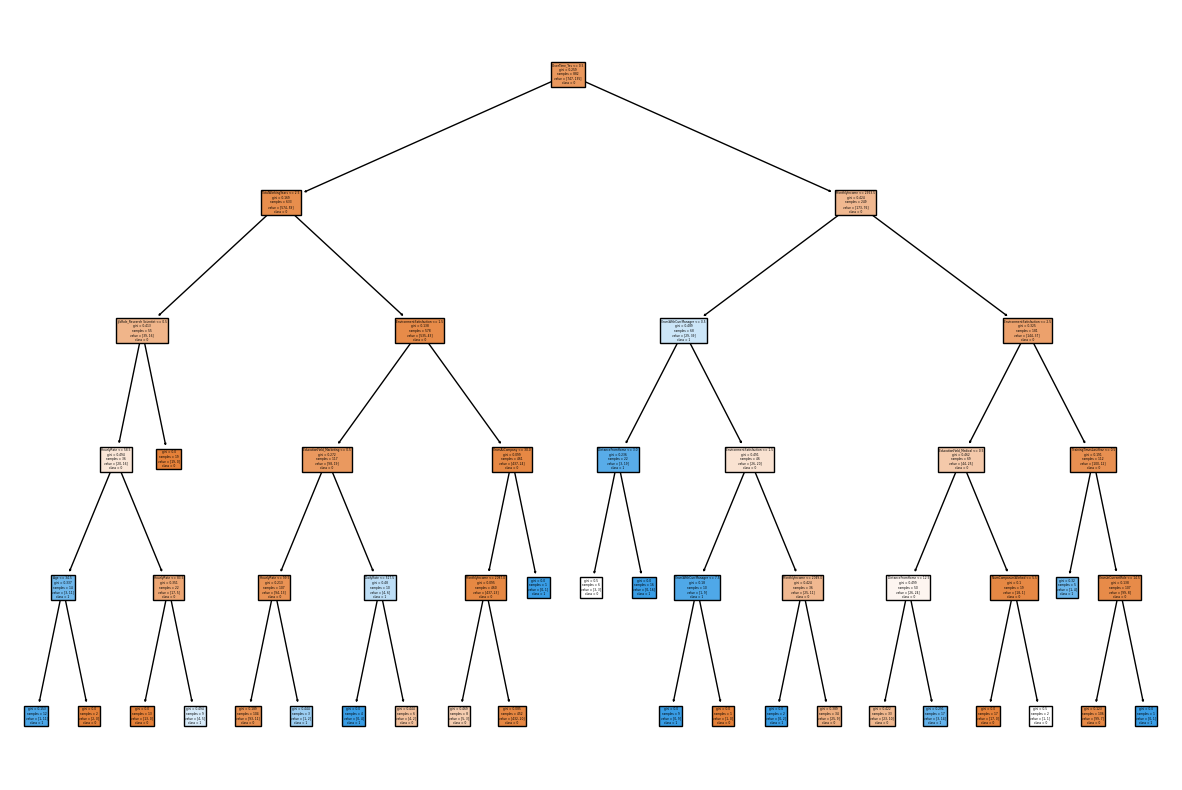

In [25]:
classTree = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001, min_samples_split=10)
 
classTree.fit(train_X, train_y)

plt.figure(figsize=(15, 10))
plot_tree(classTree, feature_names=list(X.columns), class_names=[str(cls) for cls in classTree.classes_], filled=True)
plt.show()

In [26]:
print('Training Partition for Full Tree')
classificationSummary(train_y, classTree.predict(train_X)) 
print()
print('Validation Partition for Full Tree')
classificationSummary(valid_y, classTree.predict(valid_X))


Training Partition for Full Tree
Confusion Matrix (Accuracy 0.9138)

       Prediction
Actual   0   1
     0 737  10
     1  66  69

Validation Partition for Full Tree
Confusion Matrix (Accuracy 0.8095)

       Prediction
Actual   0   1
     0 454  32
     1  80  22


In [27]:
param_grid = {
    'max_depth': list(range(2, 25)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 20)),
}

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8492
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 5}


Best Classification Tree with Grid Search


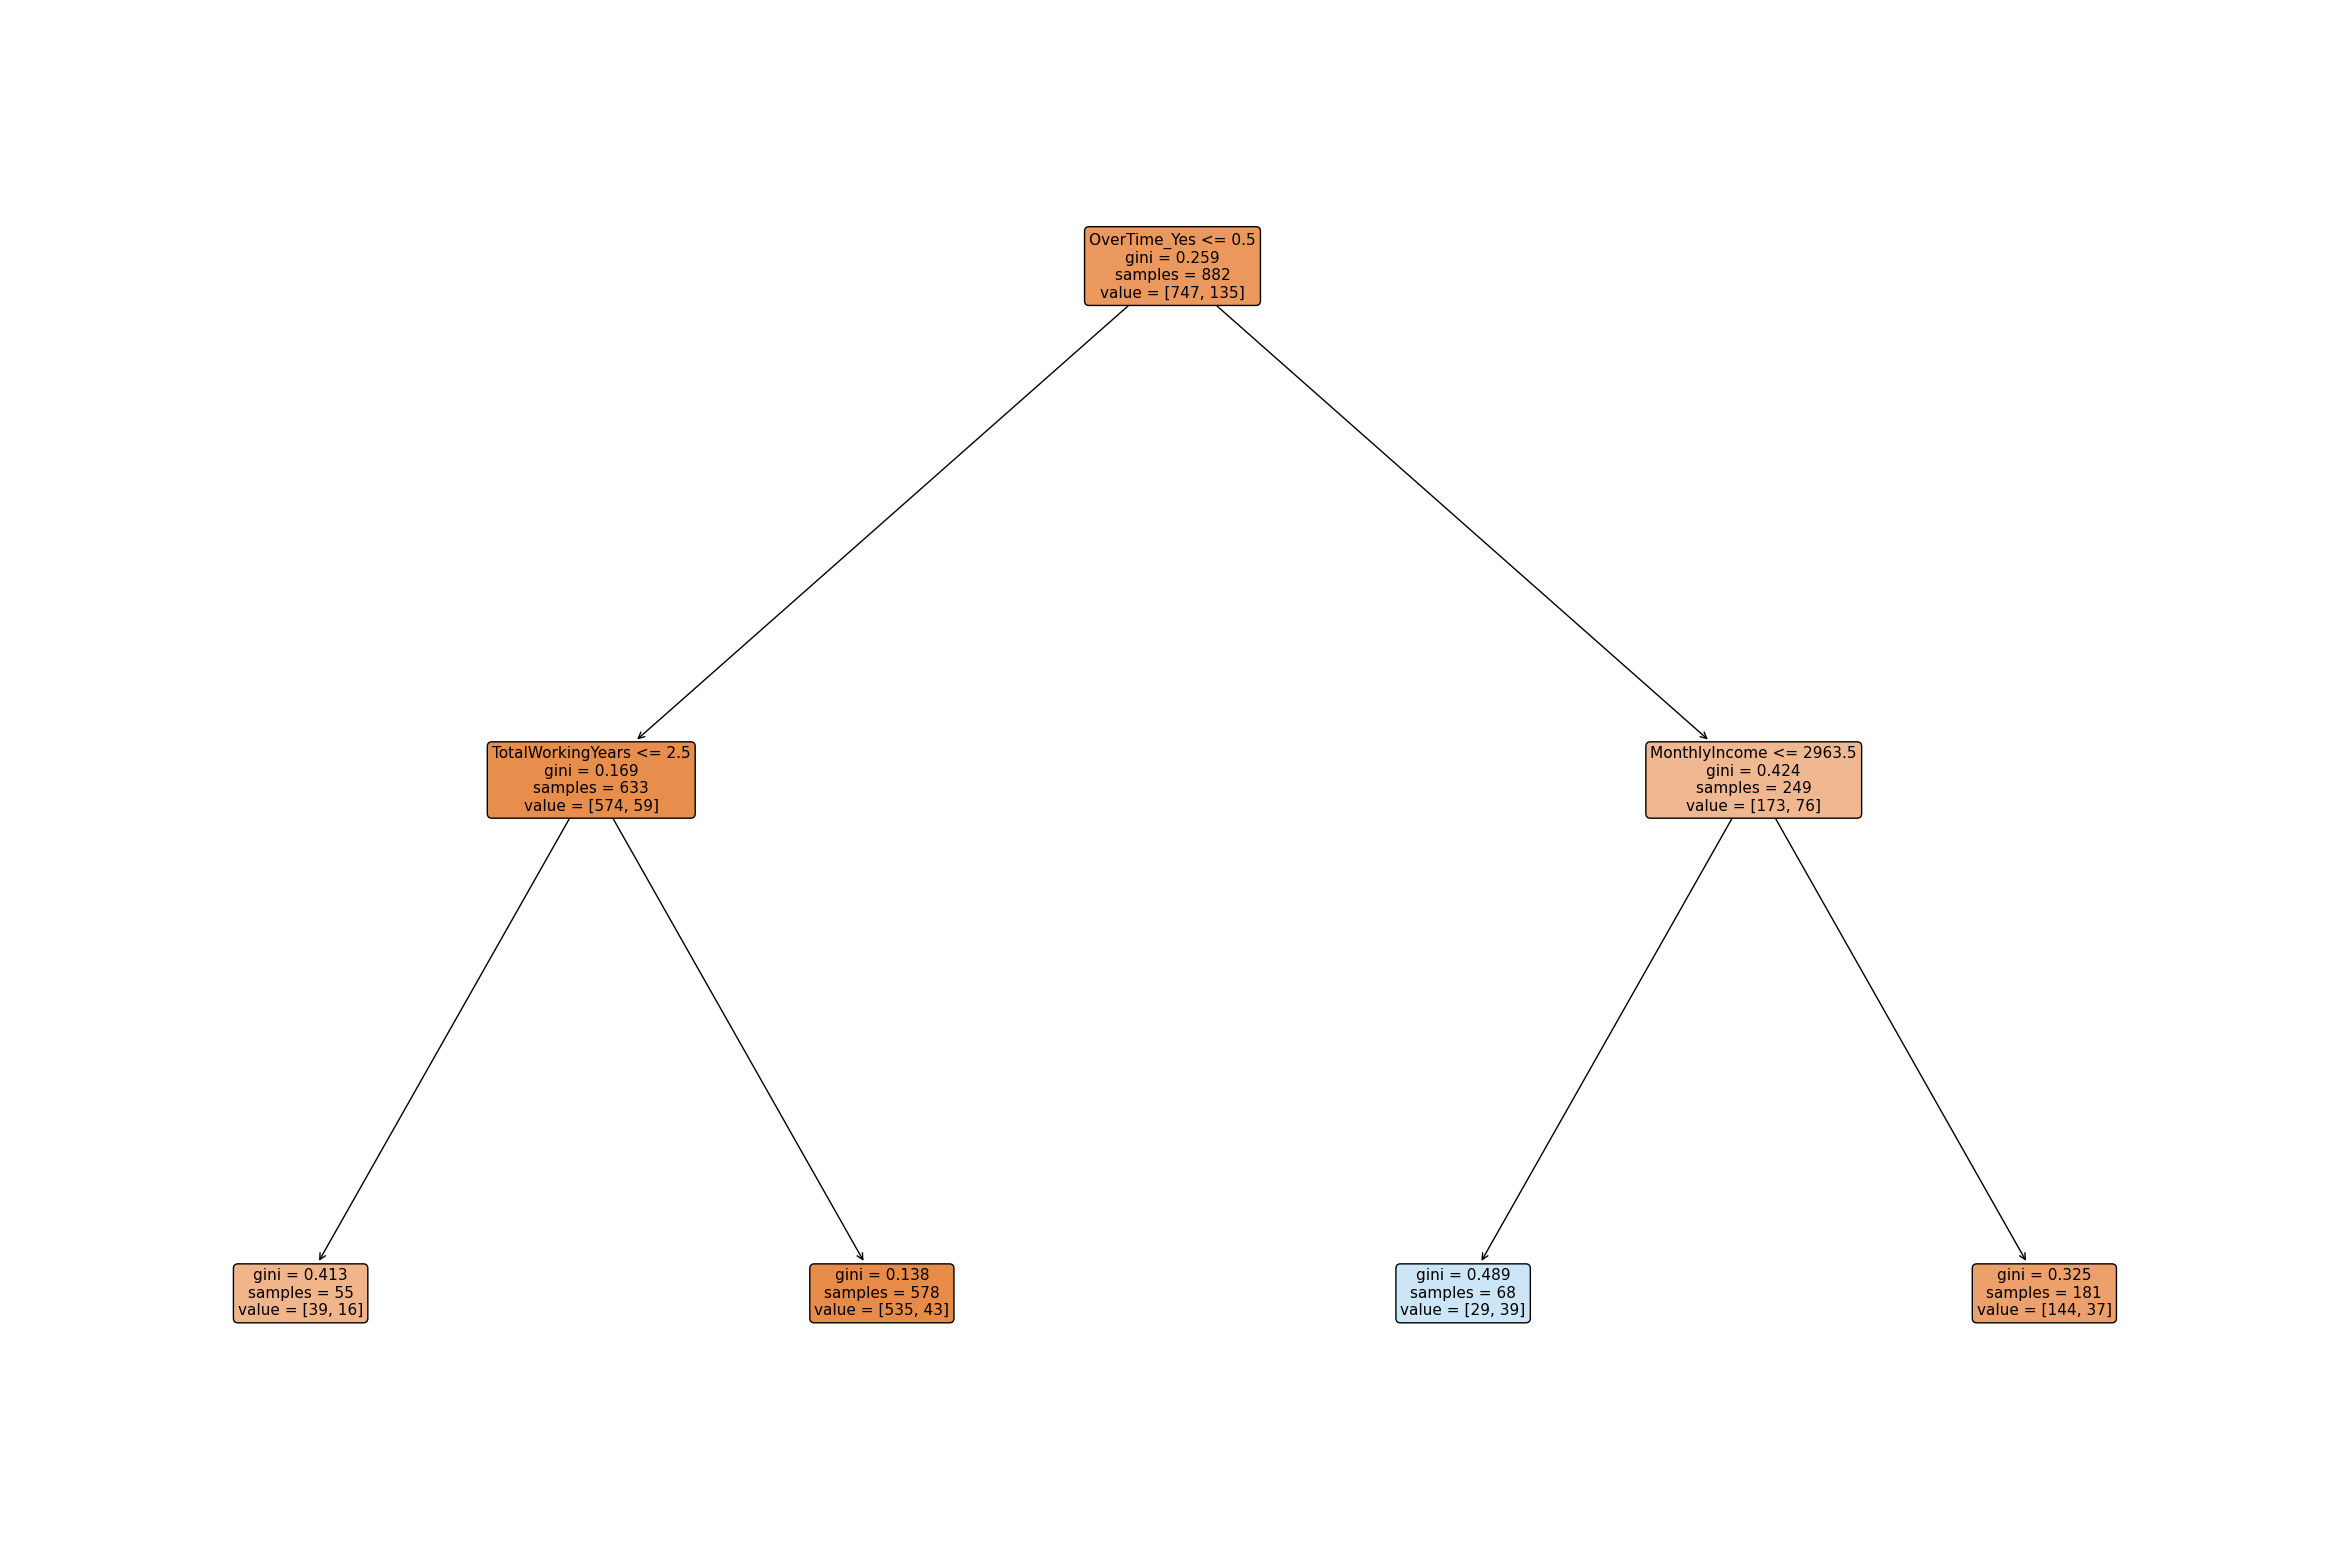

In [28]:
bestClassTree = gridSearch.best_estimator_

print('Best Classification Tree with Grid Search')

plt.figure(figsize=(30,20))

plot_best_tree = plot_tree(bestClassTree, 
                 feature_names = list(train_X.columns), 
                 filled=True, 
                 rounded=True, 
                 fontsize=11)

In [29]:
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 7


In [30]:
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8583)

       Prediction
Actual   0   1
     0 718  29
     1  96  39

Validation Partition
Confusion Matrix (Accuracy 0.8384)

       Prediction
Actual   0   1
     0 468  18
     1  77  25


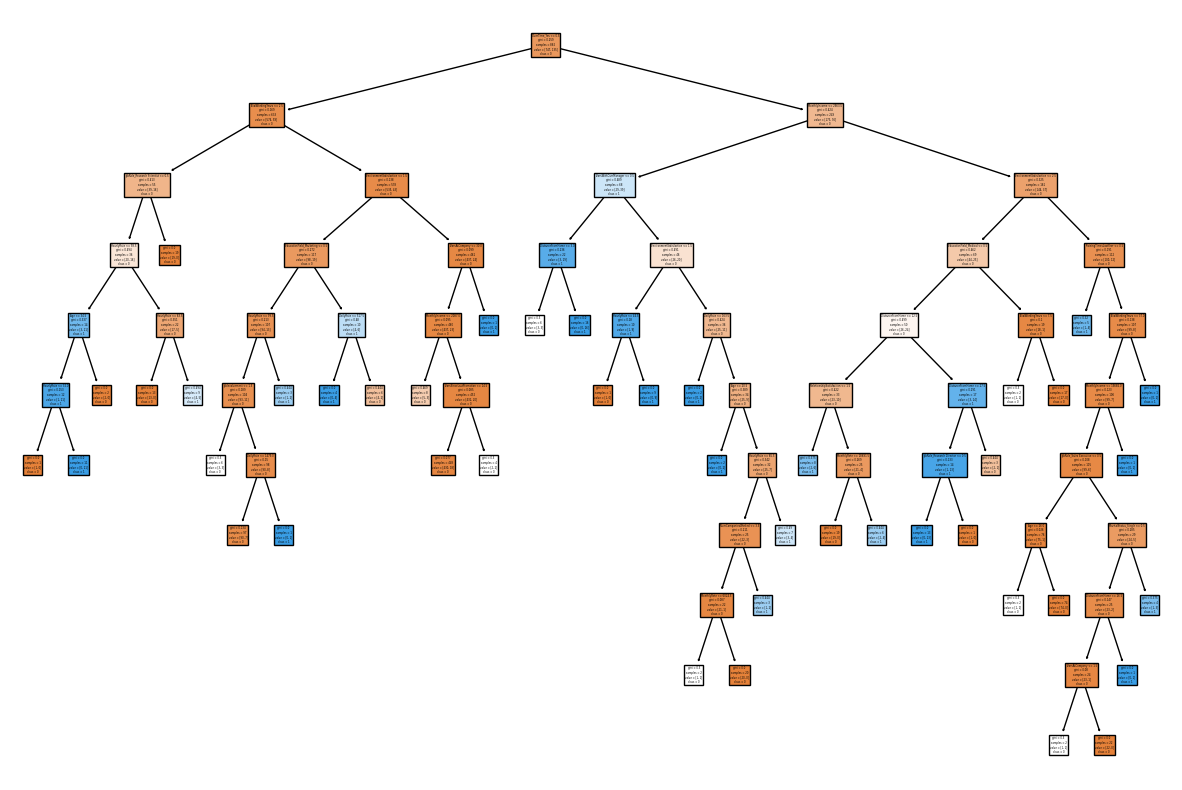

In [57]:
classTree = DecisionTreeClassifier(min_impurity_decrease=0.001, min_samples_split=10)
 
classTree.fit(train_X, train_y)

plt.figure(figsize=(15, 10))
plot_tree(classTree, feature_names=list(X.columns), class_names=[str(cls) for cls in classTree.classes_], filled=True)
plt.show()

# Implementing Neural Networks

In [29]:
#Normalizing the values. 

sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)


# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (7); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (3);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
employee_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
employee_clf.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(employee_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(employee_clf.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 47.36666264, -13.88488433,  34.35372855]), array([3.29468226])]

Network Weights for Accidents Neural Network Model
[array([[ 18.00691564,  -4.9330195 ,   4.25188861],
       [ 10.09486813, -11.10303496,  -0.6517032 ],
       [-14.13396475, -40.89449678,   7.95191889],
       [ 17.4591299 ,   2.16799605, -15.66237201],
       [ 15.39698307,   9.04472085,  14.3483274 ],
       [  3.96604029, -16.97636909,   3.5160607 ],
       [  6.46379413,  10.73162768,   6.09239173],
       [ -0.50041296,  -3.90814826,   1.01021971],
       [ 16.79782478,  15.01918181,  -8.28992153],
       [ 17.38650217,   0.31967725, -11.41476567],
       [ -4.72589925, -16.02918887,  23.46043618],
       [ -4.59445003, -41.96189402,   7.62885625],
       [ -7.80867368,  -6.95198097,  10.36310177],
       [ 14.47680191,   5.7078932 ,  -1.57536098],
       [  4.65935411,   9.49293034,   7.94882169],
       [  7.53619899,  16.82168084,   6.48849523],
      

In [59]:
# Make accident severity classification for validation set 
# using Accidents neural network model. 

# Use accident_clf model to classify accident severity
# for validation set.
employee_pred = employee_clf.predict(valid_X_sc)

# Predict accident severity probabilities p(0), p(1),
# and p(2) for validation set.
#accident_pred_prob = np.round(accident_clf.predict_proba(valid_X_sc), 
#                          decimals=4)

# Create data frame to display classification results for
# validation set. 
employee_pred_result = pd.DataFrame({'Actual': valid_y, 'Classification': employee_pred})

print('Classification for Accidents Data for Validation Partition')
print(employee_pred_result.head(30))

Classification for Accidents Data for Validation Partition
      Actual  Classification
1291       1               0
1153       1               1
720        1               1
763        0               1
976        0               0
724        0               0
314        0               0
258        0               0
442        0               0
1393       0               0
894        0               0
435        1               0
952        1               1
236        1               0
1170       0               0
1295       0               0
826        0               0
453        1               1
1230       0               0
702        0               0
1418       0               0
1252       0               0
299        0               0
53         0               0
993        0               1
311        0               0
107        1               1
37         0               0
864        1               0
640        0               0


In [60]:
# Confusion matrices for Accidents neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, employee_clf.predict(train_X_sc))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, employee_clf.predict(valid_X_sc))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9490)

       Prediction
Actual   0   1
     0 746   1
     1  44  91

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8486)

       Prediction
Actual   0   1
     0 463  23
     1  66  36


In [61]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_sc, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)


Best score:0.8685
Best parameter:  {'hidden_layer_sizes': 2}


In [33]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (7); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (3);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
employee_clf_imp = MLPClassifier(hidden_layer_sizes=(2), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
employee_clf_imp.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(employee_clf_imp.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(employee_clf_imp.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 65.22005005, -24.50462507]), array([-1.7664497])]

Network Weights for Accidents Neural Network Model
[array([[  7.50076353,   2.87359726],
       [ -5.48915158,  -3.97990728],
       [-16.25800076,  13.34733943],
       [  8.2340116 ,  12.90692315],
       [ 18.25296941,  -8.4332803 ],
       [ -3.20463667,  16.31503228],
       [ -1.24928995, -20.29623458],
       [-12.42940082,  13.32082548],
       [ 25.38572474,   4.93782947],
       [ 25.79368414, -13.97014661],
       [ 12.76933803,  25.78246849],
       [  3.65723389,  14.1001177 ],
       [ -4.81687911, -12.46947666],
       [  5.14362062, -15.75308431],
       [ 16.04001405,   3.83877492],
       [ 19.25628987, -16.51784668],
       [ 16.94671291,   7.93387853],
       [  3.73991398,  -6.55644385],
       [ 14.67222401,   4.2564862 ],
       [  7.91779872,  28.73534359],
       [ 31.72658419,  -2.54669877],
       [-26.09364809,  21.09456657],
       [ -2.98620842, 

In [34]:
# Confusion matrices for improved neural network model for Accidents
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, employee_clf_imp.predict(train_X_sc))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, employee_clf_imp.predict(valid_X_sc))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9535)

       Prediction
Actual   0   1
     0 744   3
     1  38  97

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8112)

       Prediction
Actual   0   1
     0 446  40
     1  71  31
